In [29]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
train  = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [9]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [14]:
train.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [18]:
train = train[['date','meantemp']]
test = test[['date','meantemp']]

In [17]:
train.head()

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


In [19]:
test.head()

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889


In [34]:
train = train.rename(columns={'date': 'ds', 'meantemp': 'y'})
test = test.rename(columns={'date': 'ds', 'meantemp': 'y'})

In [35]:
train

,ds,y
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
...,...,...
1457,2016-12-28,17.217391
1458,2016-12-29,15.238095
1459,2016-12-30,14.095238
1460,2016-12-31,15.052632


In [36]:
# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(train)


19:06:17 - cmdstanpy - INFO - Chain [1] start processing
19:06:18 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
# Create a dataframe for future dates (test data)
future = test[['ds']]

# Make predictions
forecast = model.predict(future)


In [38]:
print(forecast)

            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2017-01-01  27.531065   11.739298   16.976255    27.531065    27.531065   
1   2017-01-02  27.533981   12.101962   17.165852    27.533981    27.533981   
2   2017-01-03  27.536897   12.088956   17.201217    27.536897    27.536897   
3   2017-01-04  27.539812   12.357520   17.548954    27.539812    27.539812   
4   2017-01-05  27.542728   12.248994   17.366134    27.542728    27.542728   
..         ...        ...         ...         ...          ...          ...   
109 2017-04-20  27.848889   30.237536   35.461789    27.765666    27.929164   
110 2017-04-21  27.851805   30.313197   35.756595    27.767448    27.933403   
111 2017-04-22  27.854720   30.490176   35.786973    27.769231    27.937687   
112 2017-04-23  27.857636   30.485255   35.841144    27.771032    27.942373   
113 2017-04-24  27.860552   30.773231   36.225099    27.772742    27.946337   

     additive_terms  additive_terms_lower  additive

In [39]:
# Merge the forecasted values with the test data
test['yhat'] = forecast['yhat']

# Evaluate model performance (example using Mean Absolute Error)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['y'], test['yhat'])
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 2.192482426074284


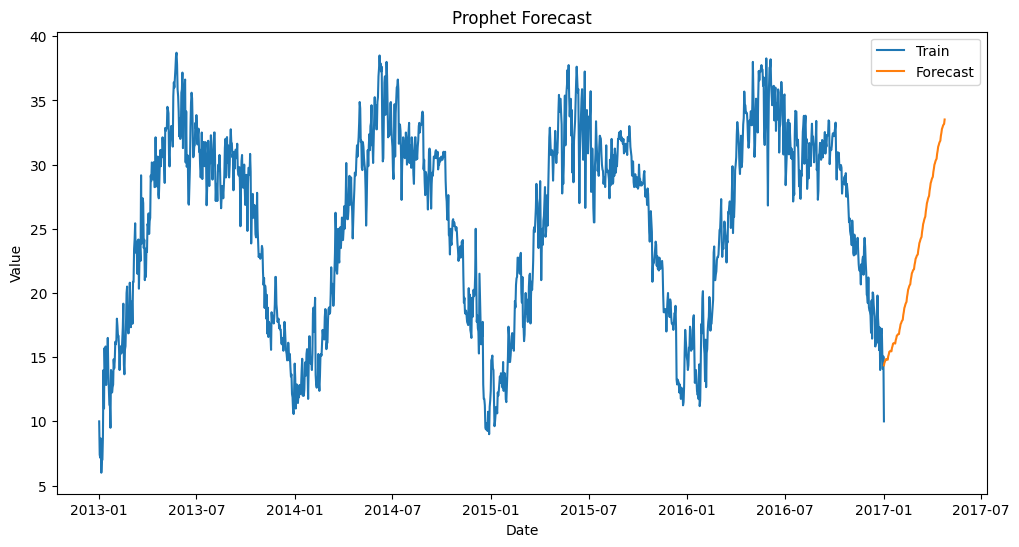

In [41]:
# Plot the forecast
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train['ds'], train['y'], label='Train')

# Plot the test data
#plt.plot(test['ds'], test['y'], label='Test')

# Plot the forecast
plt.plot(test['ds'], test['yhat'], label='Forecast')

# Add title and labels
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()


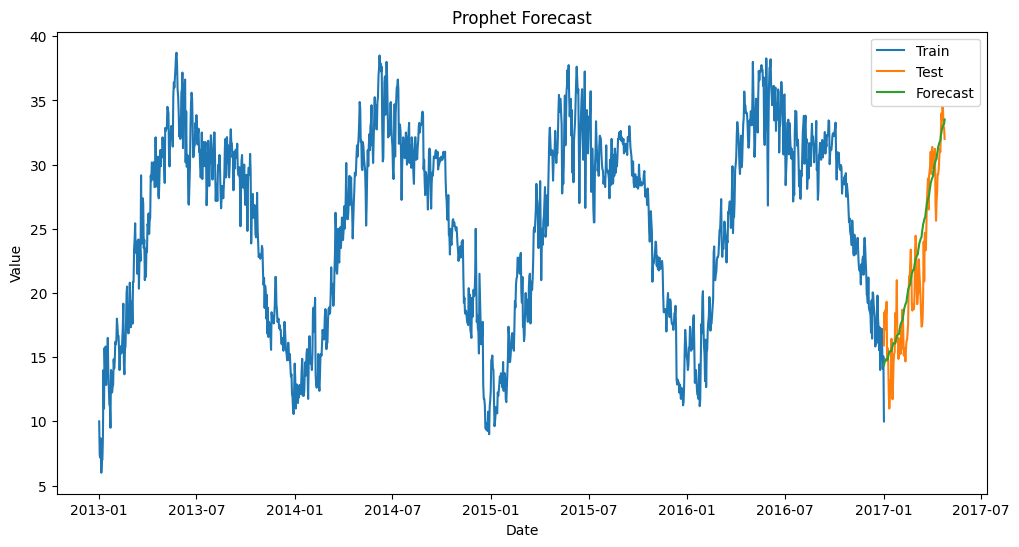

In [42]:
# Plot the forecast
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train['ds'], train['y'], label='Train')

# Plot the test data
plt.plot(test['ds'], test['y'], label='Test')

# Plot the forecast
plt.plot(test['ds'], test['yhat'], label='Forecast')

# Add title and labels
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

# Model 2

In [43]:
# Initialize the Prophet model with tuned parameters
model = Prophet(
    changepoint_prior_scale=0.05,  # Adjust this value
    seasonality_prior_scale=10.0,  # Adjust this value
    yearly_seasonality=True,       # Enable yearly seasonality
    weekly_seasonality=True,       # Enable weekly seasonality
    daily_seasonality=False        # Disable daily seasonality if not needed
)

# Fit the model
model.fit(train)


19:14:18 - cmdstanpy - INFO - Chain [1] start processing
19:14:18 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
# Create a dataframe for future dates (test data)
future = test[['ds']]

# Make predictions
forecast = model.predict(future)


In [46]:
# Merge the forecasted values with the test data
test['yhat'] = forecast['yhat']

# Evaluate model performance (example using Mean Absolute Error)
mae = mean_absolute_error(test['y'], test['yhat'])
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 2.192482426074284


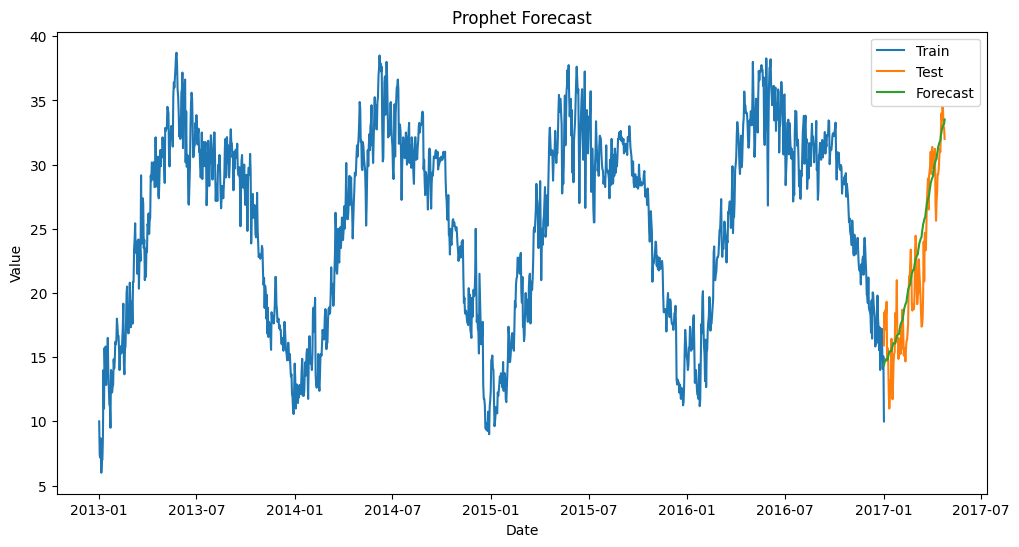

In [47]:
# Plot the forecast
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train['ds'], train['y'], label='Train')

# Plot the test data
plt.plot(test['ds'], test['y'], label='Test')

# Plot the forecast
plt.plot(test['ds'], test['yhat'], label='Forecast')

# Add title and labels
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()


# Adding daily seasonality as True


19:27:44 - cmdstanpy - INFO - Chain [1] start processing
19:27:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2.2368455081667586


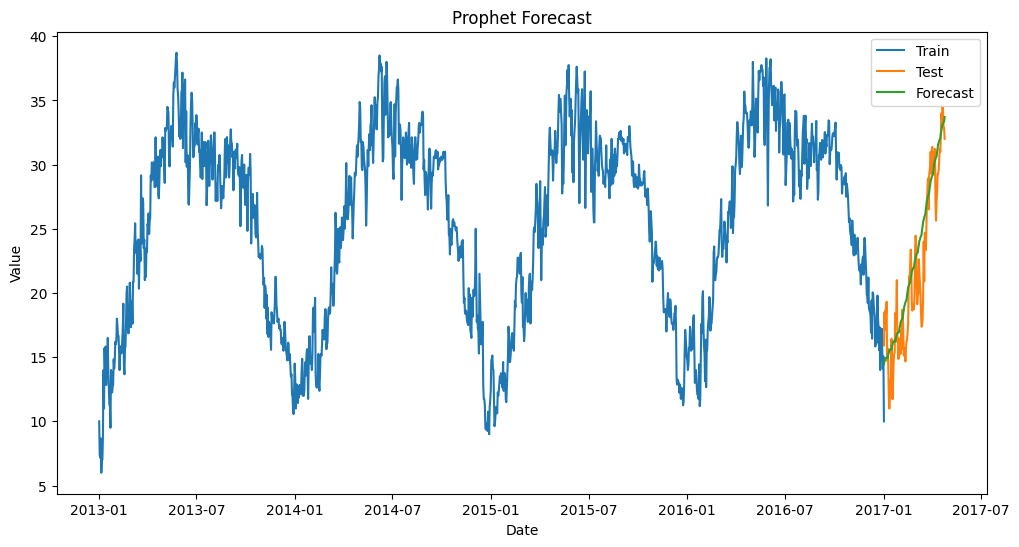

In [48]:
# Initialize the Prophet model with tuned parameters
model = Prophet(
    changepoint_prior_scale=0.05,  # Adjust this value
    seasonality_prior_scale=10.0,  # Adjust this value
    yearly_seasonality=True,       # Enable yearly seasonality
    weekly_seasonality=True,       # Enable weekly seasonality
    daily_seasonality=True        # Disable daily seasonality if not needed
)

# Fit the model
model.fit(train)

# Create a dataframe for future dates (test data)
future = test[['ds']]

# Make predictions
forecast = model.predict(future)

# Merge the forecasted values with the test data
test['yhat'] = forecast['yhat']

# Evaluate model performance
mae = mean_absolute_error(test['y'], test['yhat'])
print(f'Mean Absolute Error: {mae}')

# Plot the forecast
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train['ds'], train['y'], label='Train')

# Plot the test data
plt.plot(test['ds'], test['y'], label='Test')

# Plot the forecast
plt.plot(test['ds'], test['yhat'], label='Forecast')

# Add title and labels
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()